# Подбор по сетке параметров нейросети для предсказания параметроов "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении, МПа" 2

Предобработка

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#директория проекта
#diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'
diraddr = 'C:/Users/busyen/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузить подготовленные данные
df = pd.read_csv(diraddr + 'data/processed/df_no_outliers.csv')
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
#стандартизация
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.rename(columns={
    0:'UN',
    1:'ShN',
    2:'PN',
    3:'SMN',
    4:'P',
    5:'MU',
    6:'KO',
    7:'SEG',
    8:'TV',
    9:'PP',
    10:'MUR',
    11:'PR',
    12:'PS'
}, inplace = True)
#df.describe().T

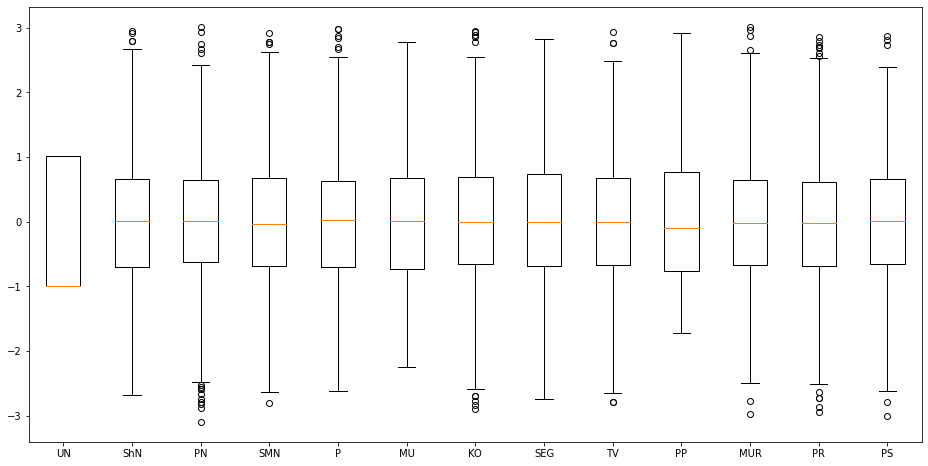

In [5]:
#вывод ящиков
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(df, labels = df.columns)
plt.show()

In [6]:
#преобразовать в массивы
x = np.array(df.drop(columns=['SMN','MUR','PR',])) #входы
y = np.array(df.drop(columns=['UN','ShN','PN','SMN','P','MU','KO','SEG','TV','PP','PS'])) #выход

In [7]:
#разделить оба массива на train и test 70 на 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700, 2), (300, 2))

Grid Search

In [33]:
#поиск по сетке с подобранными по результатам предыдущего перебора активатора и оптимизатора
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_list = {'hidden_layer_sizes': [(1,),(2,),(3,),(5,),(10,),(50,),(100,),(500,),(1000,),(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)],              
             'activation': ['logistic'],
             'solver': ['adam'],
#             'solver': ['sgd', 'adam'],
             'alpha': [0.0001],
             'max_iter': [1000],
             'verbose': [1]}
regr = GridSearchCV(MLPRegressor(), param_list, cv = 10, verbose = 1).fit(x_train, y_train)
regr.predict(x_test)
regr.score(x_test, y_test)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Iteration 1, loss = 0.52484917
Iteration 2, loss = 0.52346684
Iteration 3, loss = 0.52223566
Iteration 4, loss = 0.52097315
Iteration 5, loss = 0.51972863
Iteration 6, loss = 0.51841536
Iteration 7, loss = 0.51729883
Iteration 8, loss = 0.51596713
Iteration 9, loss = 0.51484529
Iteration 10, loss = 0.51380500
Iteration 11, loss = 0.51268853
Iteration 12, loss = 0.51167283
Iteration 13, loss = 0.51069145
Iteration 14, loss = 0.50976894
Iteration 15, loss = 0.50888898
Iteration 16, loss = 0.50801614
Iteration 17, loss = 0.50718376
Iteration 18, loss = 0.50638113
Iteration 19, loss = 0.50563675
Iteration 20, loss = 0.50483497
Iteration 21, loss = 0.50409099
Iteration 22, loss = 0.50343177
Iteration 23, loss = 0.50276567
Iteration 24, loss = 0.50209004
Iteration 25, loss = 0.50155529
Iteration 26, loss = 0.50101069
Iteration 27, loss = 0.50047204
Iteration 28, loss = 0.49990688
Iteration 29, loss = 0.49942736
Iteration 30, loss

Iteration 59, loss = 0.58584944
Iteration 60, loss = 0.58406721
Iteration 61, loss = 0.58228027
Iteration 62, loss = 0.58054236
Iteration 63, loss = 0.57887766
Iteration 64, loss = 0.57709643
Iteration 65, loss = 0.57544526
Iteration 66, loss = 0.57383898
Iteration 67, loss = 0.57222034
Iteration 68, loss = 0.57066130
Iteration 69, loss = 0.56907639
Iteration 70, loss = 0.56757092
Iteration 71, loss = 0.56600828
Iteration 72, loss = 0.56453042
Iteration 73, loss = 0.56300250
Iteration 74, loss = 0.56145721
Iteration 75, loss = 0.55999145
Iteration 76, loss = 0.55848635
Iteration 77, loss = 0.55715464
Iteration 78, loss = 0.55573142
Iteration 79, loss = 0.55432618
Iteration 80, loss = 0.55299651
Iteration 81, loss = 0.55175030
Iteration 82, loss = 0.55043277
Iteration 83, loss = 0.54921686
Iteration 84, loss = 0.54797889
Iteration 85, loss = 0.54674782
Iteration 86, loss = 0.54554625
Iteration 87, loss = 0.54441787
Iteration 88, loss = 0.54326021
Iteration 89, loss = 0.54216366
Iteratio

Iteration 134, loss = 0.50267598
Iteration 135, loss = 0.50259696
Iteration 136, loss = 0.50253093
Iteration 137, loss = 0.50247949
Iteration 138, loss = 0.50241395
Iteration 139, loss = 0.50236138
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58399168
Iteration 2, loss = 0.58142717
Iteration 3, loss = 0.57890867
Iteration 4, loss = 0.57646172
Iteration 5, loss = 0.57399433
Iteration 6, loss = 0.57162435
Iteration 7, loss = 0.56929665
Iteration 8, loss = 0.56706627
Iteration 9, loss = 0.56480594
Iteration 10, loss = 0.56266196
Iteration 11, loss = 0.56051200
Iteration 12, loss = 0.55845989
Iteration 13, loss = 0.55639442
Iteration 14, loss = 0.55435826
Iteration 15, loss = 0.55232191
Iteration 16, loss = 0.55031488
Iteration 17, loss = 0.54834142
Iteration 18, loss = 0.54637820
Iteration 19, loss = 0.54446130
Iteration 20, loss = 0.54254655
Iteration 21, loss = 0.54073698
Iteration 22, loss = 0.53893435
Iteration 23, los

Iteration 138, loss = 0.50308459
Iteration 139, loss = 0.50285859
Iteration 140, loss = 0.50261443
Iteration 141, loss = 0.50238437
Iteration 142, loss = 0.50211919
Iteration 143, loss = 0.50192639
Iteration 144, loss = 0.50171421
Iteration 145, loss = 0.50155029
Iteration 146, loss = 0.50134456
Iteration 147, loss = 0.50116821
Iteration 148, loss = 0.50097448
Iteration 149, loss = 0.50078060
Iteration 150, loss = 0.50059840
Iteration 151, loss = 0.50043772
Iteration 152, loss = 0.50027325
Iteration 153, loss = 0.50012475
Iteration 154, loss = 0.49998652
Iteration 155, loss = 0.49986074
Iteration 156, loss = 0.49969916
Iteration 157, loss = 0.49957035
Iteration 158, loss = 0.49942924
Iteration 159, loss = 0.49930758
Iteration 160, loss = 0.49918389
Iteration 161, loss = 0.49902875
Iteration 162, loss = 0.49888973
Iteration 163, loss = 0.49875563
Iteration 164, loss = 0.49860339
Iteration 165, loss = 0.49850132
Iteration 166, loss = 0.49841739
Iteration 167, loss = 0.49830950
Iteration 

Iteration 220, loss = 0.51507627
Iteration 221, loss = 0.51478509
Iteration 222, loss = 0.51449331
Iteration 223, loss = 0.51421686
Iteration 224, loss = 0.51395341
Iteration 225, loss = 0.51367893
Iteration 226, loss = 0.51342176
Iteration 227, loss = 0.51320518
Iteration 228, loss = 0.51297256
Iteration 229, loss = 0.51273430
Iteration 230, loss = 0.51250687
Iteration 231, loss = 0.51225289
Iteration 232, loss = 0.51201352
Iteration 233, loss = 0.51178063
Iteration 234, loss = 0.51158608
Iteration 235, loss = 0.51136734
Iteration 236, loss = 0.51116039
Iteration 237, loss = 0.51093908
Iteration 238, loss = 0.51072346
Iteration 239, loss = 0.51052440
Iteration 240, loss = 0.51032971
Iteration 241, loss = 0.51011781
Iteration 242, loss = 0.50994454
Iteration 243, loss = 0.50975351
Iteration 244, loss = 0.50957564
Iteration 245, loss = 0.50938671
Iteration 246, loss = 0.50920047
Iteration 247, loss = 0.50904880
Iteration 248, loss = 0.50887755
Iteration 249, loss = 0.50870991
Iteration 

Iteration 210, loss = 0.49586436
Iteration 211, loss = 0.49572619
Iteration 212, loss = 0.49561431
Iteration 213, loss = 0.49547650
Iteration 214, loss = 0.49538159
Iteration 215, loss = 0.49529535
Iteration 216, loss = 0.49518790
Iteration 217, loss = 0.49510364
Iteration 218, loss = 0.49501557
Iteration 219, loss = 0.49493349
Iteration 220, loss = 0.49483721
Iteration 221, loss = 0.49474636
Iteration 222, loss = 0.49464115
Iteration 223, loss = 0.49456645
Iteration 224, loss = 0.49448864
Iteration 225, loss = 0.49439689
Iteration 226, loss = 0.49430072
Iteration 227, loss = 0.49421976
Iteration 228, loss = 0.49415979
Iteration 229, loss = 0.49408075
Iteration 230, loss = 0.49402481
Iteration 231, loss = 0.49396151
Iteration 232, loss = 0.49389561
Iteration 233, loss = 0.49383847
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58224783
Iteration 2, loss = 0.57970014
Iteration 3, loss = 0.57716241
Iteration 4, loss = 0.574

Iteration 1, loss = 0.50817067
Iteration 2, loss = 0.50748068
Iteration 3, loss = 0.50700588
Iteration 4, loss = 0.50645576
Iteration 5, loss = 0.50592671
Iteration 6, loss = 0.50556969
Iteration 7, loss = 0.50518517
Iteration 8, loss = 0.50487422
Iteration 9, loss = 0.50465295
Iteration 10, loss = 0.50443695
Iteration 11, loss = 0.50426234
Iteration 12, loss = 0.50402496
Iteration 13, loss = 0.50383046
Iteration 14, loss = 0.50359104
Iteration 15, loss = 0.50339801
Iteration 16, loss = 0.50318945
Iteration 17, loss = 0.50300157
Iteration 18, loss = 0.50279631
Iteration 19, loss = 0.50260757
Iteration 20, loss = 0.50244701
Iteration 21, loss = 0.50230560
Iteration 22, loss = 0.50214537
Iteration 23, loss = 0.50202749
Iteration 24, loss = 0.50190367
Iteration 25, loss = 0.50178051
Iteration 26, loss = 0.50170612
Iteration 27, loss = 0.50159521
Iteration 28, loss = 0.50150016
Iteration 29, loss = 0.50139764
Iteration 30, loss = 0.50129920
Iteration 31, loss = 0.50117301
Iteration 32, los

Iteration 7, loss = 0.55768179
Iteration 8, loss = 0.55517644
Iteration 9, loss = 0.55275866
Iteration 10, loss = 0.55038042
Iteration 11, loss = 0.54809291
Iteration 12, loss = 0.54598311
Iteration 13, loss = 0.54387797
Iteration 14, loss = 0.54204230
Iteration 15, loss = 0.54019877
Iteration 16, loss = 0.53834532
Iteration 17, loss = 0.53668858
Iteration 18, loss = 0.53500054
Iteration 19, loss = 0.53334846
Iteration 20, loss = 0.53183965
Iteration 21, loss = 0.53043485
Iteration 22, loss = 0.52912093
Iteration 23, loss = 0.52778959
Iteration 24, loss = 0.52657869
Iteration 25, loss = 0.52536881
Iteration 26, loss = 0.52413476
Iteration 27, loss = 0.52307897
Iteration 28, loss = 0.52197958
Iteration 29, loss = 0.52093236
Iteration 30, loss = 0.51984892
Iteration 31, loss = 0.51887476
Iteration 32, loss = 0.51798275
Iteration 33, loss = 0.51701428
Iteration 34, loss = 0.51616107
Iteration 35, loss = 0.51530356
Iteration 36, loss = 0.51444653
Iteration 37, loss = 0.51367837
Iteration 3

Iteration 32, loss = 0.49796059
Iteration 33, loss = 0.49772014
Iteration 34, loss = 0.49752904
Iteration 35, loss = 0.49733357
Iteration 36, loss = 0.49708811
Iteration 37, loss = 0.49690926
Iteration 38, loss = 0.49671799
Iteration 39, loss = 0.49656499
Iteration 40, loss = 0.49640213
Iteration 41, loss = 0.49632487
Iteration 42, loss = 0.49613878
Iteration 43, loss = 0.49600226
Iteration 44, loss = 0.49589003
Iteration 45, loss = 0.49578641
Iteration 46, loss = 0.49570479
Iteration 47, loss = 0.49559630
Iteration 48, loss = 0.49550656
Iteration 49, loss = 0.49543090
Iteration 50, loss = 0.49534622
Iteration 51, loss = 0.49525963
Iteration 52, loss = 0.49518304
Iteration 53, loss = 0.49512226
Iteration 54, loss = 0.49503586
Iteration 55, loss = 0.49499001
Iteration 56, loss = 0.49489870
Iteration 57, loss = 0.49484534
Iteration 58, loss = 0.49475221
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63074870
Iteration 2, lo

Iteration 39, loss = 0.50573274
Iteration 40, loss = 0.50517420
Iteration 41, loss = 0.50470684
Iteration 42, loss = 0.50423812
Iteration 43, loss = 0.50379597
Iteration 44, loss = 0.50337626
Iteration 45, loss = 0.50294273
Iteration 46, loss = 0.50255141
Iteration 47, loss = 0.50214150
Iteration 48, loss = 0.50174361
Iteration 49, loss = 0.50138872
Iteration 50, loss = 0.50103650
Iteration 51, loss = 0.50063774
Iteration 52, loss = 0.50028388
Iteration 53, loss = 0.49992895
Iteration 54, loss = 0.49959020
Iteration 55, loss = 0.49921220
Iteration 56, loss = 0.49890213
Iteration 57, loss = 0.49856277
Iteration 58, loss = 0.49828714
Iteration 59, loss = 0.49802649
Iteration 60, loss = 0.49779605
Iteration 61, loss = 0.49756028
Iteration 62, loss = 0.49736678
Iteration 63, loss = 0.49718196
Iteration 64, loss = 0.49698254
Iteration 65, loss = 0.49675419
Iteration 66, loss = 0.49657464
Iteration 67, loss = 0.49635292
Iteration 68, loss = 0.49618398
Iteration 69, loss = 0.49600668
Iteratio

Iteration 45, loss = 0.49762505
Iteration 46, loss = 0.49750421
Iteration 47, loss = 0.49739260
Iteration 48, loss = 0.49725914
Iteration 49, loss = 0.49718075
Iteration 50, loss = 0.49704013
Iteration 51, loss = 0.49693019
Iteration 52, loss = 0.49683940
Iteration 53, loss = 0.49672868
Iteration 54, loss = 0.49662339
Iteration 55, loss = 0.49654784
Iteration 56, loss = 0.49642977
Iteration 57, loss = 0.49632157
Iteration 58, loss = 0.49626032
Iteration 59, loss = 0.49617013
Iteration 60, loss = 0.49608153
Iteration 61, loss = 0.49601092
Iteration 62, loss = 0.49588396
Iteration 63, loss = 0.49578050
Iteration 64, loss = 0.49568839
Iteration 65, loss = 0.49557789
Iteration 66, loss = 0.49550563
Iteration 67, loss = 0.49540163
Iteration 68, loss = 0.49532988
Iteration 69, loss = 0.49525302
Iteration 70, loss = 0.49518398
Iteration 71, loss = 0.49509245
Iteration 72, loss = 0.49501711
Iteration 73, loss = 0.49492398
Iteration 74, loss = 0.49483044
Iteration 75, loss = 0.49475895
Iteratio

Iteration 63, loss = 0.48681303
Iteration 64, loss = 0.48669215
Iteration 65, loss = 0.48659991
Iteration 66, loss = 0.48648740
Iteration 67, loss = 0.48641416
Iteration 68, loss = 0.48632370
Iteration 69, loss = 0.48621950
Iteration 70, loss = 0.48615565
Iteration 71, loss = 0.48603342
Iteration 72, loss = 0.48600791
Iteration 73, loss = 0.48593801
Iteration 74, loss = 0.48587525
Iteration 75, loss = 0.48579610
Iteration 76, loss = 0.48570933
Iteration 77, loss = 0.48564089
Iteration 78, loss = 0.48557089
Iteration 79, loss = 0.48549508
Iteration 80, loss = 0.48546916
Iteration 81, loss = 0.48534996
Iteration 82, loss = 0.48530726
Iteration 83, loss = 0.48522781
Iteration 84, loss = 0.48518200
Iteration 85, loss = 0.48511067
Iteration 86, loss = 0.48505507
Iteration 87, loss = 0.48498269
Iteration 88, loss = 0.48493302
Iteration 89, loss = 0.48488395
Iteration 90, loss = 0.48478613
Iteration 91, loss = 0.48472521
Iteration 92, loss = 0.48467680
Training loss did not improve more than 

Iteration 112, loss = 0.50464460
Iteration 113, loss = 0.50431719
Iteration 114, loss = 0.50396440
Iteration 115, loss = 0.50365205
Iteration 116, loss = 0.50336150
Iteration 117, loss = 0.50305353
Iteration 118, loss = 0.50279512
Iteration 119, loss = 0.50246108
Iteration 120, loss = 0.50221115
Iteration 121, loss = 0.50191149
Iteration 122, loss = 0.50169052
Iteration 123, loss = 0.50143915
Iteration 124, loss = 0.50121771
Iteration 125, loss = 0.50097455
Iteration 126, loss = 0.50073068
Iteration 127, loss = 0.50049296
Iteration 128, loss = 0.50026607
Iteration 129, loss = 0.50005397
Iteration 130, loss = 0.49982359
Iteration 131, loss = 0.49963727
Iteration 132, loss = 0.49943479
Iteration 133, loss = 0.49926678
Iteration 134, loss = 0.49904951
Iteration 135, loss = 0.49885949
Iteration 136, loss = 0.49869421
Iteration 137, loss = 0.49851696
Iteration 138, loss = 0.49831329
Iteration 139, loss = 0.49811422
Iteration 140, loss = 0.49796883
Iteration 141, loss = 0.49781613
Iteration 

Iteration 18, loss = 0.54584947
Iteration 19, loss = 0.54270804
Iteration 20, loss = 0.53963627
Iteration 21, loss = 0.53689670
Iteration 22, loss = 0.53422334
Iteration 23, loss = 0.53169269
Iteration 24, loss = 0.52932502
Iteration 25, loss = 0.52723698
Iteration 26, loss = 0.52512657
Iteration 27, loss = 0.52317783
Iteration 28, loss = 0.52131197
Iteration 29, loss = 0.51959211
Iteration 30, loss = 0.51790326
Iteration 31, loss = 0.51634032
Iteration 32, loss = 0.51484584
Iteration 33, loss = 0.51350603
Iteration 34, loss = 0.51229428
Iteration 35, loss = 0.51109258
Iteration 36, loss = 0.50985049
Iteration 37, loss = 0.50873539
Iteration 38, loss = 0.50779123
Iteration 39, loss = 0.50709956
Iteration 40, loss = 0.50619924
Iteration 41, loss = 0.50549928
Iteration 42, loss = 0.50469563
Iteration 43, loss = 0.50404785
Iteration 44, loss = 0.50337270
Iteration 45, loss = 0.50275976
Iteration 46, loss = 0.50217807
Iteration 47, loss = 0.50158276
Iteration 48, loss = 0.50102510
Iteratio

Iteration 27, loss = 0.50470842
Iteration 28, loss = 0.50421760
Iteration 29, loss = 0.50382284
Iteration 30, loss = 0.50335962
Iteration 31, loss = 0.50309460
Iteration 32, loss = 0.50278042
Iteration 33, loss = 0.50252017
Iteration 34, loss = 0.50226039
Iteration 35, loss = 0.50203531
Iteration 36, loss = 0.50185963
Iteration 37, loss = 0.50161587
Iteration 38, loss = 0.50142145
Iteration 39, loss = 0.50121316
Iteration 40, loss = 0.50103044
Iteration 41, loss = 0.50088066
Iteration 42, loss = 0.50069218
Iteration 43, loss = 0.50052635
Iteration 44, loss = 0.50047518
Iteration 45, loss = 0.50030784
Iteration 46, loss = 0.50019959
Iteration 47, loss = 0.50007051
Iteration 48, loss = 0.49994736
Iteration 49, loss = 0.49981402
Iteration 50, loss = 0.49969285
Iteration 51, loss = 0.49957653
Iteration 52, loss = 0.49946394
Iteration 53, loss = 0.49935055
Iteration 54, loss = 0.49927843
Iteration 55, loss = 0.49915420
Iteration 56, loss = 0.49905202
Iteration 57, loss = 0.49892583
Iteratio

Iteration 51, loss = 0.49196289
Iteration 52, loss = 0.49183008
Iteration 53, loss = 0.49171626
Iteration 54, loss = 0.49162886
Iteration 55, loss = 0.49147793
Iteration 56, loss = 0.49135837
Iteration 57, loss = 0.49120732
Iteration 58, loss = 0.49107073
Iteration 59, loss = 0.49092596
Iteration 60, loss = 0.49081109
Iteration 61, loss = 0.49069373
Iteration 62, loss = 0.49055634
Iteration 63, loss = 0.49040681
Iteration 64, loss = 0.49025923
Iteration 65, loss = 0.49022142
Iteration 66, loss = 0.49009606
Iteration 67, loss = 0.49000969
Iteration 68, loss = 0.48989878
Iteration 69, loss = 0.48977791
Iteration 70, loss = 0.48967180
Iteration 71, loss = 0.48955310
Iteration 72, loss = 0.48949032
Iteration 73, loss = 0.48938468
Iteration 74, loss = 0.48929900
Iteration 75, loss = 0.48922206
Iteration 76, loss = 0.48913716
Iteration 77, loss = 0.48902668
Iteration 78, loss = 0.48890309
Iteration 79, loss = 0.48882372
Iteration 80, loss = 0.48874070
Iteration 81, loss = 0.48870238
Iteratio

Iteration 101, loss = 0.49024689
Iteration 102, loss = 0.49015374
Iteration 103, loss = 0.49013200
Iteration 104, loss = 0.48996979
Iteration 105, loss = 0.48993829
Iteration 106, loss = 0.48983805
Iteration 107, loss = 0.48977681
Iteration 108, loss = 0.48970184
Iteration 109, loss = 0.48964920
Iteration 110, loss = 0.48952532
Iteration 111, loss = 0.48947385
Iteration 112, loss = 0.48938840
Iteration 113, loss = 0.48932425
Iteration 114, loss = 0.48928213
Iteration 115, loss = 0.48927062
Iteration 116, loss = 0.48930036
Iteration 117, loss = 0.48929288
Iteration 118, loss = 0.48920247
Iteration 119, loss = 0.48913384
Iteration 120, loss = 0.48900248
Iteration 121, loss = 0.48893918
Iteration 122, loss = 0.48892560
Iteration 123, loss = 0.48881188
Iteration 124, loss = 0.48880442
Iteration 125, loss = 0.48899724
Iteration 126, loss = 0.48887941
Iteration 127, loss = 0.48878168
Iteration 128, loss = 0.48864985
Iteration 129, loss = 0.48851181
Iteration 130, loss = 0.48848914
Iteration 

Iteration 53, loss = 0.49358975
Iteration 54, loss = 0.49345053
Iteration 55, loss = 0.49338782
Iteration 56, loss = 0.49338056
Iteration 57, loss = 0.49328963
Iteration 58, loss = 0.49323673
Iteration 59, loss = 0.49317662
Iteration 60, loss = 0.49307503
Iteration 61, loss = 0.49303181
Iteration 62, loss = 0.49296646
Iteration 63, loss = 0.49295398
Iteration 64, loss = 0.49289697
Iteration 65, loss = 0.49284264
Iteration 66, loss = 0.49275605
Iteration 67, loss = 0.49271283
Iteration 68, loss = 0.49262691
Iteration 69, loss = 0.49256848
Iteration 70, loss = 0.49249700
Iteration 71, loss = 0.49251934
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61359304
Iteration 2, loss = 0.60099684
Iteration 3, loss = 0.58921273
Iteration 4, loss = 0.57838136
Iteration 5, loss = 0.56823429
Iteration 6, loss = 0.55895911
Iteration 7, loss = 0.55062721
Iteration 8, loss = 0.54291370
Iteration 9, loss = 0.53584532
Iteration 10, loss = 0.

Iteration 19, loss = 0.50575358
Iteration 20, loss = 0.50390085
Iteration 21, loss = 0.50220296
Iteration 22, loss = 0.50070969
Iteration 23, loss = 0.49953529
Iteration 24, loss = 0.49834679
Iteration 25, loss = 0.49737670
Iteration 26, loss = 0.49648979
Iteration 27, loss = 0.49568128
Iteration 28, loss = 0.49492734
Iteration 29, loss = 0.49442975
Iteration 30, loss = 0.49396792
Iteration 31, loss = 0.49350667
Iteration 32, loss = 0.49319066
Iteration 33, loss = 0.49280916
Iteration 34, loss = 0.49254704
Iteration 35, loss = 0.49227237
Iteration 36, loss = 0.49202485
Iteration 37, loss = 0.49170477
Iteration 38, loss = 0.49150866
Iteration 39, loss = 0.49129523
Iteration 40, loss = 0.49111558
Iteration 41, loss = 0.49092633
Iteration 42, loss = 0.49076256
Iteration 43, loss = 0.49058283
Iteration 44, loss = 0.49039979
Iteration 45, loss = 0.49021264
Iteration 46, loss = 0.49002073
Iteration 47, loss = 0.48984870
Iteration 48, loss = 0.48964023
Iteration 49, loss = 0.48946080
Iteratio

Iteration 8, loss = 0.49751243
Iteration 9, loss = 0.49694918
Iteration 10, loss = 0.49592248
Iteration 11, loss = 0.49507958
Iteration 12, loss = 0.49475144
Iteration 13, loss = 0.49420102
Iteration 14, loss = 0.49380050
Iteration 15, loss = 0.49355571
Iteration 16, loss = 0.49304512
Iteration 17, loss = 0.49290111
Iteration 18, loss = 0.49265501
Iteration 19, loss = 0.49222432
Iteration 20, loss = 0.49176624
Iteration 21, loss = 0.49131416
Iteration 22, loss = 0.49115186
Iteration 23, loss = 0.49090881
Iteration 24, loss = 0.49107010
Iteration 25, loss = 0.49146821
Iteration 26, loss = 0.49126460
Iteration 27, loss = 0.49078282
Iteration 28, loss = 0.48989294
Iteration 29, loss = 0.48972694
Iteration 30, loss = 0.48950117
Iteration 31, loss = 0.48958553
Iteration 32, loss = 0.48964323
Iteration 33, loss = 0.48977943
Iteration 34, loss = 0.48941797
Iteration 35, loss = 0.48898343
Iteration 36, loss = 0.48882973
Iteration 37, loss = 0.48874757
Iteration 38, loss = 0.48863646
Iteration 

Iteration 25, loss = 0.48174165
Iteration 26, loss = 0.48131741
Iteration 27, loss = 0.48122294
Iteration 28, loss = 0.48159973
Iteration 29, loss = 0.48143230
Iteration 30, loss = 0.48118102
Iteration 31, loss = 0.48092430
Iteration 32, loss = 0.48059593
Iteration 33, loss = 0.48070123
Iteration 34, loss = 0.48086314
Iteration 35, loss = 0.48073414
Iteration 36, loss = 0.48028900
Iteration 37, loss = 0.48024403
Iteration 38, loss = 0.48009143
Iteration 39, loss = 0.48047554
Iteration 40, loss = 0.48030731
Iteration 41, loss = 0.48000062
Iteration 42, loss = 0.48053268
Iteration 43, loss = 0.48093051
Iteration 44, loss = 0.48080334
Iteration 45, loss = 0.48050357
Iteration 46, loss = 0.48010852
Iteration 47, loss = 0.47975338
Iteration 48, loss = 0.47956993
Iteration 49, loss = 0.47971551
Iteration 50, loss = 0.47978732
Iteration 51, loss = 0.47964615
Iteration 52, loss = 0.47948702
Iteration 53, loss = 0.47959788
Iteration 54, loss = 0.47968722
Iteration 55, loss = 0.47962867
Iteratio

Iteration 32, loss = 0.48476459
Iteration 33, loss = 0.48519608
Iteration 34, loss = 0.48552582
Iteration 35, loss = 0.48523333
Iteration 36, loss = 0.48480471
Iteration 37, loss = 0.48465441
Iteration 38, loss = 0.48464147
Iteration 39, loss = 0.48505397
Iteration 40, loss = 0.48550810
Iteration 41, loss = 0.48546012
Iteration 42, loss = 0.48497942
Iteration 43, loss = 0.48482907
Iteration 44, loss = 0.48475991
Iteration 45, loss = 0.48505629
Iteration 46, loss = 0.48520949
Iteration 47, loss = 0.48525411
Iteration 48, loss = 0.48490448
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51176490
Iteration 2, loss = 0.49698454
Iteration 3, loss = 0.49672111
Iteration 4, loss = 0.49703697
Iteration 5, loss = 0.49268593
Iteration 6, loss = 0.49017963
Iteration 7, loss = 0.49014532
Iteration 8, loss = 0.49007377
Iteration 9, loss = 0.48774854
Iteration 10, loss = 0.48618838
Iteration 11, loss = 0.48645032
Iteration 12, loss = 0.

Iteration 6, loss = 0.48617224
Iteration 7, loss = 0.48453897
Iteration 8, loss = 0.48556330
Iteration 9, loss = 0.48553735
Iteration 10, loss = 0.48469006
Iteration 11, loss = 0.48299558
Iteration 12, loss = 0.48323586
Iteration 13, loss = 0.48440805
Iteration 14, loss = 0.48500331
Iteration 15, loss = 0.48458460
Iteration 16, loss = 0.48236814
Iteration 17, loss = 0.48105971
Iteration 18, loss = 0.48167384
Iteration 19, loss = 0.48228311
Iteration 20, loss = 0.48182967
Iteration 21, loss = 0.48147714
Iteration 22, loss = 0.48139466
Iteration 23, loss = 0.48089363
Iteration 24, loss = 0.47998072
Iteration 25, loss = 0.48040051
Iteration 26, loss = 0.48035580
Iteration 27, loss = 0.48040092
Iteration 28, loss = 0.48065865
Iteration 29, loss = 0.47998126
Iteration 30, loss = 0.47935295
Iteration 31, loss = 0.47988729
Iteration 32, loss = 0.48053397
Iteration 33, loss = 0.47995181
Iteration 34, loss = 0.47961327
Iteration 35, loss = 0.47959825
Iteration 36, loss = 0.47941444
Iteration 37

Iteration 6, loss = 0.48510493
Iteration 7, loss = 0.49064039
Iteration 8, loss = 0.48454639
Iteration 9, loss = 0.48577065
Iteration 10, loss = 0.48645403
Iteration 11, loss = 0.48185096
Iteration 12, loss = 0.48461607
Iteration 13, loss = 0.48206580
Iteration 14, loss = 0.48295170
Iteration 15, loss = 0.48269450
Iteration 16, loss = 0.48470233
Iteration 17, loss = 0.48171072
Iteration 18, loss = 0.48545614
Iteration 19, loss = 0.48372824
Iteration 20, loss = 0.48365538
Iteration 21, loss = 0.48121620
Iteration 22, loss = 0.48528392
Iteration 23, loss = 0.48398377
Iteration 24, loss = 0.48101501
Iteration 25, loss = 0.48919857
Iteration 26, loss = 0.47947618
Iteration 27, loss = 0.49376011
Iteration 28, loss = 0.48474405
Iteration 29, loss = 0.48859730
Iteration 30, loss = 0.48304977
Iteration 31, loss = 0.48146835
Iteration 32, loss = 0.48832731
Iteration 33, loss = 0.48948877
Iteration 34, loss = 0.48508010
Iteration 35, loss = 0.48402217
Iteration 36, loss = 0.48258173
Iteration 37

Iteration 19, loss = 0.49369882
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56011238
Iteration 2, loss = 0.52157148
Iteration 3, loss = 0.50643693
Iteration 4, loss = 0.50048750
Iteration 5, loss = 0.51032283
Iteration 6, loss = 0.49002801
Iteration 7, loss = 0.49819334
Iteration 8, loss = 0.49427995
Iteration 9, loss = 0.49253220
Iteration 10, loss = 0.48988209
Iteration 11, loss = 0.48764653
Iteration 12, loss = 0.48570514
Iteration 13, loss = 0.49130515
Iteration 14, loss = 0.48620155
Iteration 15, loss = 0.49052604
Iteration 16, loss = 0.49057485
Iteration 17, loss = 0.48728719
Iteration 18, loss = 0.48626865
Iteration 19, loss = 0.48439173
Iteration 20, loss = 0.48992199
Iteration 21, loss = 0.48635575
Iteration 22, loss = 0.48579065
Iteration 23, loss = 0.48623497
Iteration 24, loss = 0.48411237
Iteration 25, loss = 0.48656563
Iteration 26, loss = 0.48392774
Iteration 27, loss = 0.48432740
Iteration 28, loss = 0.

Iteration 20, loss = 0.49249537
Iteration 21, loss = 0.49445604
Iteration 22, loss = 0.49742839
Iteration 23, loss = 0.49300231
Iteration 24, loss = 0.49710199
Iteration 25, loss = 0.49496314
Iteration 26, loss = 0.49241530
Iteration 27, loss = 0.50587317
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54321445
Iteration 2, loss = 0.55238313
Iteration 3, loss = 0.50446841
Iteration 4, loss = 0.49914877
Iteration 5, loss = 0.50123967
Iteration 6, loss = 0.50024917
Iteration 7, loss = 0.50055977
Iteration 8, loss = 0.49479858
Iteration 9, loss = 0.49729438
Iteration 10, loss = 0.49221482
Iteration 11, loss = 0.50133457
Iteration 12, loss = 0.49230135
Iteration 13, loss = 0.50447836
Iteration 14, loss = 0.50070756
Iteration 15, loss = 0.49339242
Iteration 16, loss = 0.49744487
Iteration 17, loss = 0.49461408
Iteration 18, loss = 0.49154854
Iteration 19, loss = 0.49098924
Iteration 20, loss = 0.49328782
Iteration 21, loss = 0.

Iteration 15, loss = 0.49001084
Iteration 16, loss = 0.48974852
Iteration 17, loss = 0.48973832
Iteration 18, loss = 0.48930801
Iteration 19, loss = 0.48903390
Iteration 20, loss = 0.48826613
Iteration 21, loss = 0.48827654
Iteration 22, loss = 0.48807533
Iteration 23, loss = 0.48789699
Iteration 24, loss = 0.48773493
Iteration 25, loss = 0.48782765
Iteration 26, loss = 0.48775968
Iteration 27, loss = 0.48762731
Iteration 28, loss = 0.48748077
Iteration 29, loss = 0.48724609
Iteration 30, loss = 0.48732343
Iteration 31, loss = 0.48726650
Iteration 32, loss = 0.48872852
Iteration 33, loss = 0.48779169
Iteration 34, loss = 0.48712494
Iteration 35, loss = 0.48723878
Iteration 36, loss = 0.48702027
Iteration 37, loss = 0.48684233
Iteration 38, loss = 0.48723028
Iteration 39, loss = 0.48785850
Iteration 40, loss = 0.48770918
Iteration 41, loss = 0.48657704
Iteration 42, loss = 0.48730954
Iteration 43, loss = 0.48762028
Iteration 44, loss = 0.48730582
Iteration 45, loss = 0.48854733
Iteratio

Iteration 14, loss = 0.48799858
Iteration 15, loss = 0.48859555
Iteration 16, loss = 0.48888650
Iteration 17, loss = 0.48793878
Iteration 18, loss = 0.48686135
Iteration 19, loss = 0.48639170
Iteration 20, loss = 0.48628885
Iteration 21, loss = 0.48638886
Iteration 22, loss = 0.48712407
Iteration 23, loss = 0.48673296
Iteration 24, loss = 0.48584557
Iteration 25, loss = 0.48528151
Iteration 26, loss = 0.48578381
Iteration 27, loss = 0.48674236
Iteration 28, loss = 0.48682818
Iteration 29, loss = 0.48559601
Iteration 30, loss = 0.48499781
Iteration 31, loss = 0.48681273
Iteration 32, loss = 0.48751753
Iteration 33, loss = 0.48534232
Iteration 34, loss = 0.48523626
Iteration 35, loss = 0.48861131
Iteration 36, loss = 0.48680458
Iteration 37, loss = 0.48428912
Iteration 38, loss = 0.48510429
Iteration 39, loss = 0.48510656
Iteration 40, loss = 0.48431378
Iteration 41, loss = 0.48456970
Iteration 42, loss = 0.48442818
Iteration 43, loss = 0.48404904
Iteration 44, loss = 0.48390036
Iteratio

Iteration 74, loss = 0.48866033
Iteration 75, loss = 0.48790725
Iteration 76, loss = 0.49034329
Iteration 77, loss = 0.49074064
Iteration 78, loss = 0.48809894
Iteration 79, loss = 0.48895300
Iteration 80, loss = 0.48867535
Iteration 81, loss = 0.48861975
Iteration 82, loss = 0.48880979
Iteration 83, loss = 0.48874688
Iteration 84, loss = 0.48790780
Iteration 85, loss = 0.49147830
Iteration 86, loss = 0.49072550
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56169666
Iteration 2, loss = 0.50180857
Iteration 3, loss = 0.51279198
Iteration 4, loss = 0.51008093
Iteration 5, loss = 0.49949662
Iteration 6, loss = 0.50101083
Iteration 7, loss = 0.50294422
Iteration 8, loss = 0.49856750
Iteration 9, loss = 0.49799666
Iteration 10, loss = 0.49942551
Iteration 11, loss = 0.49929819
Iteration 12, loss = 0.49705334
Iteration 13, loss = 0.49847375
Iteration 14, loss = 0.49959302
Iteration 15, loss = 0.49566172
Iteration 16, loss = 0.

Iteration 9, loss = 0.48890880
Iteration 10, loss = 0.48807802
Iteration 11, loss = 0.48760763
Iteration 12, loss = 0.48719481
Iteration 13, loss = 0.48824410
Iteration 14, loss = 0.48658836
Iteration 15, loss = 0.48641337
Iteration 16, loss = 0.48620192
Iteration 17, loss = 0.48734728
Iteration 18, loss = 0.48650231
Iteration 19, loss = 0.48536532
Iteration 20, loss = 0.48592948
Iteration 21, loss = 0.48657055
Iteration 22, loss = 0.48598961
Iteration 23, loss = 0.48467508
Iteration 24, loss = 0.48642822
Iteration 25, loss = 0.48582814
Iteration 26, loss = 0.48416692
Iteration 27, loss = 0.48458379
Iteration 28, loss = 0.48570252
Iteration 29, loss = 0.48391303
Iteration 30, loss = 0.48371482
Iteration 31, loss = 0.48431955
Iteration 32, loss = 0.48526889
Iteration 33, loss = 0.48412283
Iteration 34, loss = 0.48337336
Iteration 35, loss = 0.48359947
Iteration 36, loss = 0.48379809
Iteration 37, loss = 0.48396731
Iteration 38, loss = 0.48248613
Iteration 39, loss = 0.48476896
Iteration

Iteration 44, loss = 0.48635545
Iteration 45, loss = 0.48620359
Iteration 46, loss = 0.48598494
Iteration 47, loss = 0.48624557
Iteration 48, loss = 0.48581758
Iteration 49, loss = 0.48778974
Iteration 50, loss = 0.48660796
Iteration 51, loss = 0.48622607
Iteration 52, loss = 0.48770020
Iteration 53, loss = 0.48755980
Iteration 54, loss = 0.48665216
Iteration 55, loss = 0.48595831
Iteration 56, loss = 0.48530456
Iteration 57, loss = 0.48709742
Iteration 58, loss = 0.48773385
Iteration 59, loss = 0.48552212
Iteration 60, loss = 0.48453688
Iteration 61, loss = 0.48578016
Iteration 62, loss = 0.48484393
Iteration 63, loss = 0.48493619
Iteration 64, loss = 0.48559625
Iteration 65, loss = 0.48500324
Iteration 66, loss = 0.48538748
Iteration 67, loss = 0.48514792
Iteration 68, loss = 0.48555816
Iteration 69, loss = 0.48427138
Iteration 70, loss = 0.48533133
Iteration 71, loss = 0.48466717
Iteration 72, loss = 0.48464929
Iteration 73, loss = 0.48499061
Iteration 74, loss = 0.48421971
Iteratio

Iteration 22, loss = 0.49214675
Iteration 23, loss = 0.48986885
Iteration 24, loss = 0.49108433
Iteration 25, loss = 0.49257682
Iteration 26, loss = 0.49091830
Iteration 27, loss = 0.49073939
Iteration 28, loss = 0.49178177
Iteration 29, loss = 0.48972551
Iteration 30, loss = 0.48951392
Iteration 31, loss = 0.49052207
Iteration 32, loss = 0.48942898
Iteration 33, loss = 0.49186686
Iteration 34, loss = 0.48971759
Iteration 35, loss = 0.49154707
Iteration 36, loss = 0.49265891
Iteration 37, loss = 0.48824547
Iteration 38, loss = 0.49010212
Iteration 39, loss = 0.49290811
Iteration 40, loss = 0.48869738
Iteration 41, loss = 0.48970689
Iteration 42, loss = 0.48904942
Iteration 43, loss = 0.48916480
Iteration 44, loss = 0.48780026
Iteration 45, loss = 0.48895264
Iteration 46, loss = 0.48875478
Iteration 47, loss = 0.48830979
Iteration 48, loss = 0.48898104
Iteration 49, loss = 0.48767447
Iteration 50, loss = 0.48659744
Iteration 51, loss = 0.48809092
Iteration 52, loss = 0.48742542
Iteratio

Iteration 16, loss = 0.50190042
Iteration 17, loss = 0.50081601
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54183756
Iteration 2, loss = 0.49858380
Iteration 3, loss = 0.50266820
Iteration 4, loss = 0.49719594
Iteration 5, loss = 0.49609654
Iteration 6, loss = 0.49622684
Iteration 7, loss = 0.49560388
Iteration 8, loss = 0.49534386
Iteration 9, loss = 0.49512626
Iteration 10, loss = 0.49800354
Iteration 11, loss = 0.49623874
Iteration 12, loss = 0.49592747
Iteration 13, loss = 0.49903240
Iteration 14, loss = 0.49547901
Iteration 15, loss = 0.49536399
Iteration 16, loss = 0.49519016
Iteration 17, loss = 0.49439088
Iteration 18, loss = 0.49478223
Iteration 19, loss = 0.49574665
Iteration 20, loss = 0.49564057
Iteration 21, loss = 0.49749914
Iteration 22, loss = 0.49788563
Iteration 23, loss = 0.49536719
Iteration 24, loss = 0.49566545
Iteration 25, loss = 0.49559700
Iteration 26, loss = 0.49391970
Iteration 27, loss = 0.

Iteration 10, loss = 0.50438724
Iteration 11, loss = 0.50519200
Iteration 12, loss = 0.50390724
Iteration 13, loss = 0.50570736
Iteration 14, loss = 0.50442361
Iteration 15, loss = 0.50327503
Iteration 16, loss = 0.50254692
Iteration 17, loss = 0.50332204
Iteration 18, loss = 0.50402794
Iteration 19, loss = 0.50291912
Iteration 20, loss = 0.50242578
Iteration 21, loss = 0.50327276
Iteration 22, loss = 0.50319899
Iteration 23, loss = 0.50289620
Iteration 24, loss = 0.50318798
Iteration 25, loss = 0.50475583
Iteration 26, loss = 0.50304798
Iteration 27, loss = 0.50332834
Iteration 28, loss = 0.50341066
Iteration 29, loss = 0.50244771
Iteration 30, loss = 0.51065648
Iteration 31, loss = 0.50674509
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51259612
Iteration 2, loss = 0.48963747
Iteration 3, loss = 0.48993564
Iteration 4, loss = 0.48848990
Iteration 5, loss = 0.48870196
Iteration 6, loss = 0.48844748
Iteration 7, loss = 

Iteration 21, loss = 0.50319155
Iteration 22, loss = 0.50702663
Iteration 23, loss = 0.50618045
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57691037
Iteration 2, loss = 0.49158694
Iteration 3, loss = 0.50832785
Iteration 4, loss = 0.50123496
Iteration 5, loss = 0.48746355
Iteration 6, loss = 0.49174203
Iteration 7, loss = 0.49095417
Iteration 8, loss = 0.48807207
Iteration 9, loss = 0.48888790
Iteration 10, loss = 0.48868202
Iteration 11, loss = 0.48890283
Iteration 12, loss = 0.49003111
Iteration 13, loss = 0.48850284
Iteration 14, loss = 0.48925977
Iteration 15, loss = 0.48831043
Iteration 16, loss = 0.49178245
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52687343
Iteration 2, loss = 0.50079096
Iteration 3, loss = 0.50400702
Iteration 4, loss = 0.50028338
Iteration 5, loss = 0.50378938
Iteration 6, loss = 0.50080393
Iteration 7, loss = 0.50024480
Iter

-0.005560371484942372

In [34]:
regr.best_estimator_

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 100, 100, 100),
             max_iter=1000, verbose=1)

In [35]:
regr.best_index_

12

In [36]:
regr.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100, 100, 100),
 'max_iter': 1000,
 'solver': 'adam',
 'verbose': 1}

In [37]:
regr.best_score_

-0.020576099961603513

In [38]:
regr.cv_results_ = pd.DataFrame(regr.cv_results_)
regr.cv_results_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.346791      0.160617          0.00186        0.004602   
1        0.226904      0.083129          0.00000        0.000000   
2        0.220067      0.069450          0.00050        0.000500   
3        0.201329      0.045004          0.00030        0.000458   
4        0.238723      0.053859          0.00020        0.000400   
5        0.223302      0.039140          0.00196        0.004571   
6        0.206982      0.023862          0.00010        0.000300   
7        0.490925      0.109878          0.00176        0.004652   
8        0.900009      0.234408          0.00332        0.006168   
9        0.207182      0.040414          0.00000        0.000000   
10       0.835868      0.154701          0.00010        0.000300   
11       0.724907      0.523671          0.00030        0.000640   
12       0.540165      0.133650          0.00186        0.004624   
13       0.594646      0.139676          0.00382        0.005982   

   param_activation param_alpha   param_hidden_layer_sizes param_max_iter  \
0          logistic      0.0001                       (1,)           1000   
1          logistic      0.0001                       (2,)           1000   
2          logistic      0.0001                       (3,)           1000   
3          logistic      0.0001                       (5,)           1000   
4          logistic      0.0001                      (10,)           1000   
5          logistic      0.0001                      (50,)           1000   
6          logistic      0.0001                     (100,)           1000   
7          logistic      0.0001                     (500,)           1000   
8          logistic      0.0001                    (1000,)           1000   
9          logistic      0.0001                     (100,)           1000   
10         logistic      0.0001                 (100, 100)           1000   
11         logistic      0.0001            (100, 100, 100)           1000   
12         logistic      0.0001       (100, 100, 100, 100)           1000   
13         logistic      0.0001  (100, 100, 100, 100, 100)           1000   

   param_solver param_verbose  ... split3_test_score  split4_test_score  \
0          adam             1  ...         -0.028686          -0.050258   
1          adam             1  ...         -0.043482          -0.065006   
2          adam             1  ...         -0.052314          -0.079420   
3          adam             1  ...         -0.015040          -0.091068   
4          adam             1  ...         -0.038977          -0.077430   
5          adam             1  ...         -0.046853          -0.094049   
6          adam             1  ...         -0.047091          -0.073938   
7          adam             1  ...         -0.051250          -0.078389   
8          adam             1  ...         -0.048424          -0.107272   
9          adam             1  ...         -0.039050          -0.071091   
10         adam             1  ...         -0.033449          -0.085497   
11         adam             1  ...         -0.028941          -0.117187   
12         adam             1  ...         -0.009117          -0.070110   
13         adam             1  ...         -0.020874          -0.078437   

    split5_test_score  split6_test_score  split7_test_score  \
0           -0.027520          -0.028197          -0.045137   
1           -0.006979           0.015334          -0.039169   
2           -0.007920          -0.010244          -0.038910   
3           -0.007384          -0.008780          -0.016689   
4            0.004886          -0.010309          -0.022751   
5            0.004905           0.002414          -0.015979   
6            0.011337          -0.001623          -0.024773   
7            0.011487          -0.134707          -0.009453   
8            0.022963          -0.012045           0.005213   
9            0.012790           0.001856           0.012444   
10      